<a href="https://colab.research.google.com/github/abrarAhmed-Real/Data-Science-and-Machine-Learning/blob/main/Another_copy_of_Am_gasit_ceva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers lets_plot datasets
# !pip install lets_plot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn import metrics
from lets_plot import *
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import os
import torch
import warnings

warnings.filterwarnings('ignore')
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f'Using GPU : {torch.cuda.get_device_name(0)}')
else:
    device = torch.device("cpu")
    print(f'Using CPU')

LetsPlot.setup_html()

Using CPU


Generating train split:   0%|          | 0/46032 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11508 [00:00<?, ? examples/s]

Map:   0%|          | 0/46032 [00:00<?, ? examples/s]

Map:   0%|          | 0/11508 [00:00<?, ? examples/s]

                                                text             labels_text
0  Thats true but [NAME] is still a valuable reso...             realization
1  I don't see how a NBC journalist's departure i...  annoyance, disapproval
2  If [NAME] supporters trigger you more than mas...                 neutral
3  What if you're someone, like me, who believes ...               curiosity
4                       You are normal. Very normal.                approval


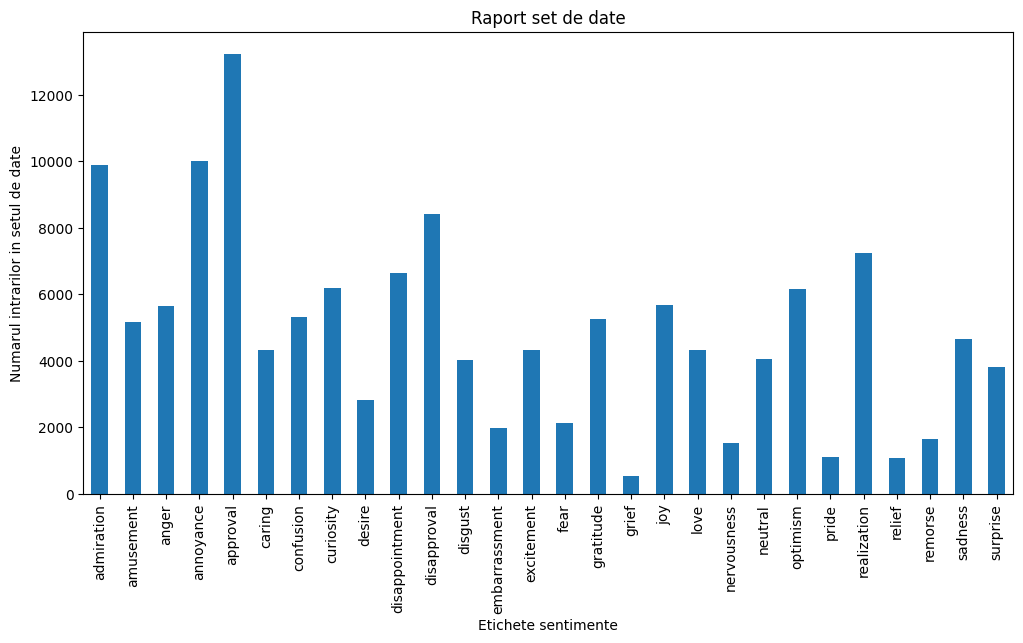

In [ ]:
# !pip install datasets
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

dataset = load_dataset("sebdg/go_emotions_cleaned")

train_df = dataset['train'].to_pandas()
test_df =dataset['test'].to_pandas()

full_df = pd.concat([train_df, test_df], ignore_index=True)

# Split the labels_text column into separate labels
all_labels = []
for labels in full_df['labels_text']:
    all_labels.extend(labels.split(', '))

# Create a DataFrame for the labels
labels_df = pd.DataFrame(all_labels, columns=['label'])

# Count the occurrences of each label
label_counts = labels_df['label'].value_counts().sort_index()

columns_to_keep = ['text', 'labels_text']

dataset_filtered = dataset.map(lambda example: {col: example[col] for col in columns_to_keep})
selected_columns_df = full_df[['text', 'labels_text']]

# Display the selected columns
print(selected_columns_df.head())
selected_columns_df


plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.title('Raport set de date')
plt.xlabel('Etichete sentimente')
plt.ylabel('Numarul intrarilor in setul de date')
plt.xticks(rotation=90)
plt.show()

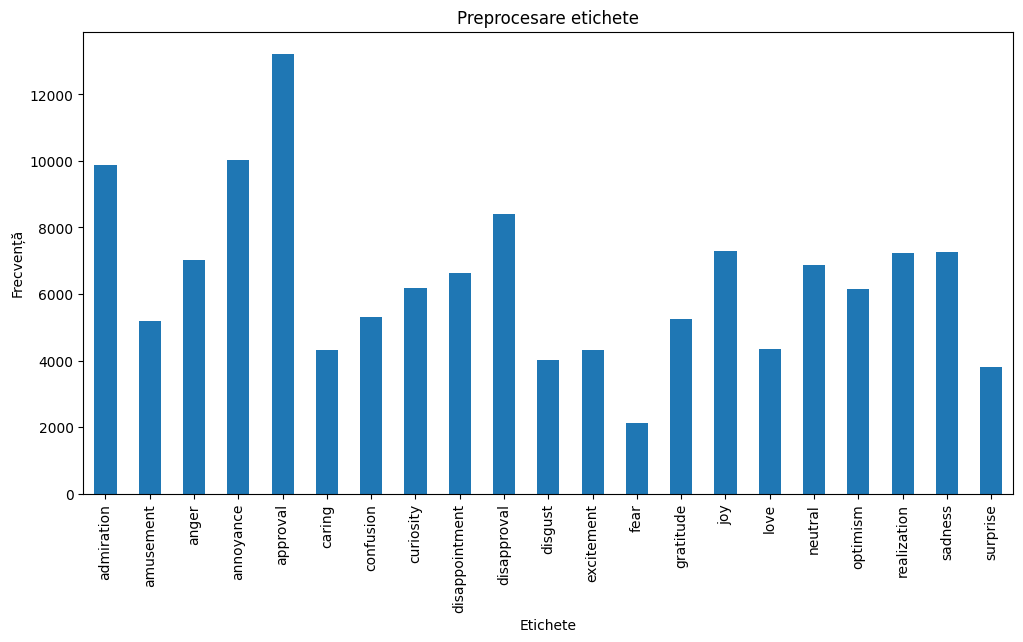

In [ ]:
import numpy as np
import pandas as pd
dataset_train = pd.DataFrame(dataset['train'])
dataset_test = pd.DataFrame(dataset['test'])

dataset_dataFrame= pd.concat([dataset_train, dataset_test], ignore_index=True)

label_mapping = {
    'admiration': 'admiration', 'amusement': 'amusement', 'anger': 'anger', 'annoyance': 'annoyance',
    'approval': 'approval', 'caring': 'caring', 'confusion': 'confusion', 'curiosity': 'curiosity',
    'desire': 'neutral', 'disappointment': 'disappointment', 'disapproval': 'disapproval', 'disgust': 'disgust',
    'excitement': 'excitement', 'fear': 'fear', 'gratitude': 'gratitude',
    'grief': 'sadness', 'joy': 'joy', 'love': 'love', 'nervousness': 'anger', 'neutral': 'neutral',
    'optimism': 'optimism', 'pride': 'joy', 'realization': 'realization', 'relief': 'joy', 'remorse': 'sadness',
    'embarrassment':'sadness','sadness': 'sadness', 'surprise': 'surprise'
}

unique_labels=[
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'neutral', 'disappointment', 'disapproval',
    'disgust', 'sadness', 'excitement', 'fear', 'gratitude', 'joy',
    'love', 'optimism', 'realization', 'surprise'
]

data=pd.DataFrame(dataset_dataFrame)

def map_labels_text(labels_text):
    sentiments = [label.strip() for label in labels_text.split(',')]

    # Înlocuirea etichetelor conform mapping-ului
    mapped_sentiments = [label_mapping[label] for label in sentiments]

    # Eliminarea duplicatelor și păstrarea etichetelor unice
    unique_mapped_sentiments = list(set(mapped_sentiments))

    # Întoarcerea textului cu etichetele unice
    return ', '.join(unique_mapped_sentiments)

data['labels_text'] = data['labels_text'].apply(map_labels_text)

#  Numără exemplele pentru fiecare etichetă nouă
all_labels = []
for labels in data['labels_text']:
    all_labels.extend(labels.split(', '))

labels_df = pd.DataFrame(all_labels, columns=['label'])
# Elimină etichetele goale sau nevalid din DataFrame
labels_df = labels_df[labels_df['label'] != '']
# Contorizează etichetele
label_counts = labels_df['label'].value_counts().sort_index()
# Afișează distribuția noilor etichete folosind matplotlib
plt.figure(figsize=(12, 6))
label_counts.plot(kind='bar')
plt.title('Preprocesare etichete')
plt.xlabel('Etichete')
plt.ylabel('Frecvență')
plt.show()



In [ ]:
# Creați un nou DataFrame cu coloanele one-hot pentru fiecare etichetă unică
for label in unique_labels:
    data[label] = data['labels_text'].apply(lambda x: 1 if label in [lbl.strip() for lbl in x.split(',')] else 0)

# Combinați etichetele one-hot într-o singură coloană 'labels'
data['labels'] = data[unique_labels].values.tolist()

# Selectați coloanele de interes (text și etichete one-hot)
new_df = data[['text'] + unique_labels + ['labels']]

import re
from nltk.corpus import stopwords
import nltk

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing
new_df['text'] = new_df['text'].apply(preprocess_text)

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

new_df['text'] = new_df['text'].apply(remove_stopwords)

# Print pentru a verifica rezultatul
print(new_df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                text  admiration  amusement  \
0  thats true name still valuable resource busine...           0          0   
1  dont see nbc journalists departure relevant sc...           0          0   
2  name supporters trigger mass murdering childwi...           0          0   
3  youre someone like believes man made global wa...           0          0   
4                                      normal normal           0          0   

   anger  annoyance  approval  caring  confusion  curiosity  neutral  ...  \
0      0          0         0       0          0          0        0  ...   
1      0          1         0       0          0          0        0  ...   
2      0          0         0       0          0          0        1  ...   
3      0          0         0       0          0          1        0  ...   
4      0          0         1       0          0          0        0  ...   

   sadness  excitement  fear  gratitude  joy  love  optimism  

In [ ]:

data=new_df
text_data = data.text.values
labels_data = list(data.labels)
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
print(data.head())
print(len(labels_data))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

                                                text  admiration  amusement  \
0  thats true name still valuable resource busine...           0          0   
1  dont see nbc journalists departure relevant sc...           0          0   
2  name supporters trigger mass murdering childwi...           0          0   
3  youre someone like believes man made global wa...           0          0   
4                                      normal normal           0          0   

   anger  annoyance  approval  caring  confusion  curiosity  neutral  ...  \
0      0          0         0       0          0          0        0  ...   
1      0          1         0       0          0          0        0  ...   
2      0          0         0       0          0          0        1  ...   
3      0          0         0       0          0          1        0  ...   
4      0          0         1       0          0          0        0  ...   

   sadness  excitement  fear  gratitude  joy  love  optimism  

In [ ]:
max_len = np.zeros(len(text_data))
for i in range(len(text_data)):
    input_ids = tokenizer.encode(text_data[i], add_special_tokens=True)
    max_len[i] = len(input_ids)
print('Max length: ', max_len.max())

Max length:  76.0


In [ ]:
input_ids = []
attention_masks = []

for text in text_data:
    encoded_dict = tokenizer.encode_plus(
                        text,
                        add_special_tokens = True,
                        max_length = 128,
                        pad_to_max_length = True,
                        truncation=True,
                        return_attention_mask = True,
                        return_tensors = 'pt')
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels_tensor = torch.tensor(labels_data)

In [ ]:
dataset = TensorDataset(input_ids, attention_masks, labels_tensor)
train_size = int(0.8*len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, test_dataset = random_split(dataset, [train_size + val_size, test_size])
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

print(f'Total amount of samples : {train_size + val_size + test_size}')
print(f'Train set : {train_size}')
print(f'Validation set : {val_size}')
print(f'Test set : {test_size}')

Total amount of samples : 57540
Train set : 46032
Validation set : 5754
Test set : 5754


In [ ]:
batch_size = 16
train_dataloader = DataLoader(
            train_dataset,
            sampler = RandomSampler(train_dataset),
            batch_size = batch_size)

validation_dataloader = DataLoader(
            val_dataset,
            sampler = RandomSampler(val_dataset),
            batch_size = batch_size)

test_dataloader = DataLoader(
            test_dataset,
            sampler = RandomSampler(test_dataset),
            batch_size = batch_size)

In [ ]:
from torch import nn

In [ ]:
class SentimentClassifier(nn.Module):
    def __init__(self,num_classes):
        super(SentimentClassifier,self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(p = 0.3)
        self.linear = nn.Linear(self.bert.config.hidden_size,num_classes)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self,input_ids , attention_mask):
        temp = self.bert(input_ids,attention_mask)
        pooled_output = temp[1]
        out = self.dropout(pooled_output)
        out = self.linear(out)
        return out

In [ ]:
bert_model_name = 'bert-base-uncased'
class Classifier(nn.Module):
    def __init__(self,num_classes):
        super(Classifier,self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(p = 0.3)
        self.linear = nn.Linear(self.bert.config.hidden_size,num_classes)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self,input_ids , attention_mask):
        temp = self.bert(input_ids,attention_mask) # Here we have added one linear layer on top of
        pooled_output = temp[1]                    # BERT-base with number of output = 3
        out = self.dropout(pooled_output)          #
        out = self.linear(out)
        return out

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class EmotionClassification(Dataset):
    def __init__(self, email, target, tokenizer, max_len):
        self.email = email
        self.target = target
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.email)

    def __getitem__(self,index):
        email = self.email[index]
        encoding = self.tokenizer.encode_plus(
                          email,
                          add_special_tokens=True,
                          max_length=self.max_len,
                          truncation=True,
                          return_token_type_ids=False,
                          pad_to_max_length=True,
                          return_attention_mask=True,
                          return_tensors='pt')

        return {'email' : email,
                'input_id': encoding['input_ids'].flatten(),
                'attention_mask':encoding['attention_mask'].flatten(),
                'target': torch.tensor(self.target[index], dtype = torch.long)
               }

In [ ]:
d=data.sample(frac=0.8)

In [ ]:
len(d)

46032

In [ ]:
from sklearn.model_selection import train_test_split
# import pandas as pd


train_val_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# Split train+validation into separate train and validation sets (80% train, 20% validation)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Verify the splits
print(f'Train size: {len(train_df)}')
print(f'Validation size: {len(val_df)}')
print(f'Test size: {len(test_df)}')



Train size: 34524
Validation size: 11508
Test size: 11508


In [ ]:
data.columns

Index(['text', 'admiration', 'amusement', 'anger', 'annoyance', 'approval',
       'caring', 'confusion', 'curiosity', 'neutral', 'disappointment',
       'disapproval', 'disgust', 'sadness', 'excitement', 'fear', 'gratitude',
       'joy', 'love', 'optimism', 'realization', 'surprise', 'labels'],
      dtype='object')

In [ ]:
train_data=EmotionClassification(data.text,data.labels,tokenizer,76)
val_data=EmotionClassification(val_df.text,val_df.labels,tokenizer,76)
test_data=EmotionClassification(test_df.text,test_df.labels,tokenizer,76)

In [ ]:
train_loader=DataLoader(train_data,batch_size=64,shuffle=True)
test_loader=DataLoader(test_data,batch_size=64)
val_loader=DataLoader(val_data,batch_size=64)

In [ ]:
# next(iter(train_loader))

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch

# Assuming 'data' is your DataFrame and 'tokenizer' is already defined

# Split the data into train+validation and test sets (80% train+validation, 20% test)
train_val_df, test_df = train_test_split(d, test_size=0.2, random_state=42)
train_val_df = train_val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Split train+validation into separate train and validation sets (80% train, 20% validation)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# Verify the splits
print(f'Train size: {len(train_df)}')
print(f'Validation size: {len(val_df)}')
print(f'Test size: {len(test_df)}')

class EmotionClassification(Dataset):
    def __init__(self, email, target, tokenizer, max_len):
        self.email = email
        self.target = target
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.email)

    def __getitem__(self, index):
        email = self.email[index]
        encoding = self.tokenizer.encode_plus(
            email,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'email': email,
            'input_id': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'target': torch.tensor(self.target[index], dtype=torch.long)
        }

# Create instances of EmotionClassification with reset indices DataFrames
train_data = EmotionClassification(train_df['text'], train_df['labels'], tokenizer, 76)
val_data = EmotionClassification(val_df['text'], val_df['labels'], tokenizer, 76)
test_data = EmotionClassification(test_df['text'], test_df['labels'], tokenizer, 76)

# Create DataLoader instances
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

# Check a batch
# next(iter(train_loader))


Train size: 27618
Validation size: 9207
Test size: 9207


In [ ]:
# val_data

In [ ]:
# next(iter(train_loader))

In [ ]:
import torch
import transformers
from transformers import BertModel
import torch.nn as nn
import pickle
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [ ]:
# data['labels']

In [ ]:
num_classes = 21
bert_model_name = 'bert-base-uncased'
## loss and optimizer
learning_rate = 1e-5
EPOCHS = 20

model = Classifier(num_classes)
model = model.to(device)

total_steps = len(train_data) * EPOCHS

criterian = torch.nn.CrossEntropyLoss().to(device)

optimizer = transformers.AdamW(params = model.parameters(),lr = learning_rate, correct_bias= False)

scheduler = transformers.get_linear_schedule_with_warmup(optimizer = optimizer,
                                                        num_warmup_steps = 0,
                                                        num_training_steps = total_steps)

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
def train_model(model, data_loader, criterian, optimizer, scheduler, n_examples):

    model.train()
    train_loss = []
    correct_pred = 0

    for d in data_loader:
        input_ids = d['input_id'].to(device)
        attention_masks = d['attention_mask'].to(device)
        targets = d['target'].to(device)

        # forward prop
        predictions = model(input_ids , attention_masks)
        targets = torch.argmax(targets, dim=1)
        loss = criterian(predictions, targets)
        _,pred_classes = torch.max(predictions, dim=1)
        #backprop
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # hack to avoid gradient explotion
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

        train_loss.append(loss.item())
        correct_pred += torch.sum(pred_classes==targets)
    return correct_pred / n_examples , np.mean(train_loss)

In [ ]:
def eval_model(model, data_loader, criterian, n_examples):
    model.eval()
    eval_loss = []
    correct_pred = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d['input_id'].to(device)
            attention_masks = d['attention_mask'].to(device)
            targets = torch.argmax(d['target'].to(device),dim=1)


            # forward prop
            predictions = model(input_ids , attention_masks)
            loss = criterian(predictions, targets)
            _,pred_classes = torch.max(predictions, dim=1)

            eval_loss.append(loss.item())
            correct_pred += torch.sum(pred_classes==targets)
    return correct_pred / n_examples , np.mean(eval_loss)

In [ ]:
len(data)

57540

In [ ]:
def train_model(model, data_loader, criterian, optimizer, scheduler):

    model.train()
    train_loss = 0.0
    correct_pred = 0
    total_preds = 0

    for d in data_loader:
        input_ids = d['input_id'].to(device)
        attention_masks = d['attention_mask'].to(device)
        targets = d['target'].to(device)

        # forward prop
        predictions = model(input_ids , attention_masks)
        targets = torch.argmax(targets, dim=1)
        loss = criterian(predictions, targets)
        _, pred_classes = torch.max(predictions, dim=1)

        #backprop
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # hack to avoid gradient explosion
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

        train_loss += loss.item()
        correct_pred += torch.sum(pred_classes == targets)
        total_preds += targets.size(0)

    accuracy = correct_pred.double() / total_preds
    avg_train_loss = train_loss / total_preds

    return accuracy, avg_train_loss


def eval_model(model, data_loader, criterian):
    model.eval()
    eval_loss = 0.0
    correct_pred = 0
    total_preds = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d['input_id'].to(device)
            attention_masks = d['attention_mask'].to(device)
            targets = torch.argmax(d['target'].to(device), dim=1)

            # forward prop
            predictions = model(input_ids, attention_masks)
            loss = criterian(predictions, targets)
            _, pred_classes = torch.max(predictions, dim=1)

            eval_loss += loss.item()
            correct_pred += torch.sum(pred_classes == targets)
            total_preds += targets.size(0)

    accuracy = correct_pred.double() / total_preds
    avg_eval_loss = eval_loss / total_preds

    return accuracy, avg_eval_loss


In [ ]:
from collections import defaultdict

history = defaultdict(list)
best_accuracy = 0
EPOCHS = 10

for epoch in range(EPOCHS):
    print(f'epoch : {epoch+1}/{EPOCHS}')
    train_acc , train_loss = train_model(model,
                                         train_loader,
                                         criterian,
                                         optimizer,
                                         scheduler)

    val_acc , val_loss = eval_model(model,
                                    val_loader,
                                    criterian)

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    print(f'train_loss: {train_loss}, train_acc: {train_acc} ,val_loss: {val_loss}, val_acc: {val_acc}')
    if val_acc > best_accuracy:
        best_model_name = f'best_model_state_{val_acc}.bin'
        torch.save(model.state_dict(), best_model_name)
        best_accuracy = val_acc

epoch : 1/10


In [ ]:
def predict_model(model, data_loader):
    model.eval()
    all_predictions = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_id'].to(device)
            attention_masks = batch['attention_mask'].to(device)

            # Forward pass
            outputs = model(input_ids, attention_masks)
            predictions = torch.argmax(outputs, dim=1)

            # Collect predictions
            all_predictions.extend(predictions.cpu().numpy())

    return all_predictions

# Assuming you have a DataLoader named test_loader
predictions = predict_model(model, test_loader)

# Print or use predictions as needed
# print(predictions)


In [ ]:
def predict_model(model, data_loader):
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_id'].to(device)
            attention_masks = batch['attention_mask'].to(device)
            targets = torch.argmax(batch['target'].to(device),dim=1)

            # Forward pass
            outputs = model(input_ids, attention_masks)
            predictions = torch.argmax(outputs, dim=1)

            # Collect predictions and targets
            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    return all_predictions, all_targets

# Assuming you have a DataLoader named test_loader
predictions, targets = predict_model(model, val_loader)

# Calculate accuracy
accuracy = (np.array(predictions) == np.array(targets)).mean()

print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.0313


In [ ]:
# next(iter(test_loader))

In [ ]:
# next(iter(train_loader))

In [ ]:
import torch.nn.functional as F

bert_model_name = 'bert-base-uncased'
class Classifier(nn.Module):
    def __init__(self, num_classes):
        super(Classifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(p=0.3)
        self.linear = nn.Linear(self.bert.config.hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_ids, attention_mask):
        temp = self.bert(input_ids, attention_mask)
        pooled_output = temp[1]
        out = self.dropout(pooled_output)
        out = self.linear(out)
        return out

num_classes = 21
learning_rate = 1e-5
EPOCHS = 20

model = Classifier(num_classes)
model = model.to(device)

total_steps = len(train_data) * EPOCHS

criterian = torch.nn.CrossEntropyLoss().to(device)

optimizer = transformers.AdamW(params=model.parameters(), lr=learning_rate, correct_bias=False)

scheduler = transformers.get_linear_schedule_with_warmup(optimizer=optimizer,
                                                         num_warmup_steps=0,
                                                         num_training_steps=total_steps)

model.train()
train_loss = []
correct_pred = 0

for i in range(10000):

  for step, d in enumerate(train_loader):
      input_ids = d['input_id'].unsqueeze(0).to(device)  # Ensure the shape is (batch_size, seq_length)
      attention_masks = d['attention_mask'].unsqueeze(0).to(device)  # Ensure the shape is (batch_size, seq_length)
      targets = d['target'].unsqueeze(0).to(device)  # Ensure the shape is (batch_size, num_classes)

      print(f'Batch {step+1}:')
      print(f'input_ids shape: {input_ids.shape}')
      print(f'attention_mask shape: {attention_masks.shape}')
      print(f'targets shape: {targets.shape}')

      # Convert one-hot encoded targets to class indices
      target_indices = torch.argmax(targets, dim=1)

      # forward prop
      predictions = model(input_ids, attention_masks)
      loss = criterian(predictions, target_indices)
      _, pred_classes = torch.max(predictions, dim=1)

      # backprop
      loss.backward()
      nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # hack to avoid gradient explosion
      optimizer.step()
      scheduler.step()
      optimizer.zero_grad()

      train_loss.append(loss.item())
      correct_pred += torch.sum(pred_classes == target_indices)

      # For debugging, break after one batch
      if step == 0:
          break

  train_acc = correct_pred / len(train_data)
  avg_train_loss = np.mean(train_loss)

  print(f"Training Accuracy: {train_acc:.4f}")
  print(f"Average Training Loss: {avg_train_loss:.4f}")


Batch 1:
input_ids shape: torch.Size([1, 64, 76])
attention_mask shape: torch.Size([1, 64, 76])
targets shape: torch.Size([1, 64, 21])


ValueError: too many values to unpack (expected 2)

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained(
    model_name,
    problem_type="multi_label_classification",
    num_labels = 21,
    output_attentions = False,
    output_hidden_states = False,
)

In [ ]:
model.to(device)

In [ ]:
model.cuda()

In [ ]:
learning_rate = 0.001
optimizer = AdamW(model.parameters(),
                  lr = learning_rate)
epochs = 10
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)


def get_probs(logits, threshold=0.5):
    sigm = 1 / (1 + np.exp(-logits))
    #return sigm >= 0.5
    return sigm

def flat_accuracy(preds, labels):
    res = np.zeros(labels.shape[0])
    for i in range(labels.shape[0]):
        res[i] = np.all(preds[i] == labels[i])
    return np.sum(res) / labels.shape[0]

def compute_f1_macro(out, pred):
    return metrics.f1_score(pred, out, average='macro')

def compute_f1_micro(out, pred):
    return metrics.f1_score(pred, out, average='micro')

In [ ]:
early_stopping_patience = 2
best_val_loss = float('inf')
early_stopping_counter = 0

from torch.nn import BCEWithLogitsLoss

# Extrage etichetele din train_dataset
all_labels = []
for batch in train_dataloader:
    labels = batch[2].cpu().numpy()
    all_labels.extend(labels)

# Convertește etichetele într-un array numpy
train_labels = np.array(all_labels)

# Calcularea ponderilor pentru funcția de pierdere
class_counts = np.sum(train_labels, axis=0)
class_weights = 1. / class_counts
print("Class Weights:", class_weights)
class_weights = class_weights / np.sum(class_weights)  # Normalizarea ponderilor
print("Normalized Class Weights:", class_weights)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

print("Normalized Class Weights:", class_weights)

# Definirea funcției de pierdere cu ponderi
loss_fn = BCEWithLogitsLoss(pos_weight=class_weights)

In [ ]:
print('Training started...')

np.random.seed(42)
random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)


training_stats = []

for epoch_i in range(epochs):
    print()
    print('#-----------------------#')
    print(f'     Epoch : {epoch_i + 1} / {epochs}')
    print('#-----------------------#')

    model.train()
    total_train_loss = 0

    for step, batch in enumerate(train_dataloader):
        batch_input_ids = batch[0].to(device)
        batch_input_mask = batch[1].to(device)
        batch_labels = batch[2].float().to(device)
        # it should be optimizer.zero_grad()
        optimizer.zero_grad()

        # model.zero_grad()

        result = model(batch_input_ids,
                        attention_mask=batch_input_mask,
                        labels=batch_labels,
                        return_dict=True)
        loss = result.loss
        logits = result.logits
        #loss=loss_fn(result.logits, batch_labels)

        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)

    print(f'Average train loss : {avg_train_loss:.3f}')
    print()
    print('Validation started...')
    print()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    total_eval_f1_micro = 0
    total_eval_f1_macro = 0
    nb_eval_steps = 0
    all_labels = []
    all_preds = []

    for batch in validation_dataloader:
        batch_input_ids = batch[0].to(device)
        batch_input_mask = batch[1].to(device)
        batch_labels = batch[2].float().to(device)

        with torch.no_grad():
            result = model(batch_input_ids,
                            attention_mask=batch_input_mask,
                            labels=batch_labels,
                            return_dict=True)

        loss = result.loss
        logits = result.logits

        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = batch_labels.to('cpu').numpy()

         # Transform logits to binary predictions using threshold
        preds = (get_probs(logits) >= 0.5).astype(int)

        all_labels.extend(label_ids)
        all_preds.extend(preds)

        total_eval_accuracy += flat_accuracy(preds, label_ids)
        total_eval_f1_micro += compute_f1_micro(label_ids, preds)
        total_eval_f1_macro += compute_f1_macro(label_ids, preds)

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    avg_val_f1_micro = total_eval_f1_micro / len(validation_dataloader)
    avg_val_f1_macro = total_eval_f1_macro / len(validation_dataloader)
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    print(f'Average validation loss : {avg_val_loss:.3f}')
    print('Average validation metrics:')
    print('----------------')
    print(f'Accuracy : {avg_val_accuracy:.3f}')
    print(f'f1-score micro : {avg_val_f1_micro:.3f}')
    print(f'f1-score macro : {avg_val_f1_macro:.3f}')

    training_stats.append(
            {
                'epoch': epoch_i + 1,
                'train_loss': avg_train_loss,
                'valid_loss': avg_val_loss,
                'val_accuracy': avg_val_accuracy,
                'val_f1_micro' : avg_val_f1_micro,
                'val_f1_macro' : avg_val_f1_macro
})
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Save model checkpoint
    output_dir = './model_save/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

print()
print('Training finished...')


Training started...

#-----------------------#
     Epoch : 1 / 10
#-----------------------#
Average train loss : 0.344

Validation started...

Average validation loss : 0.342
Average validation metrics:
----------------
Accuracy : 0.000
f1-score micro : 0.000
f1-score macro : 0.000

#-----------------------#
     Epoch : 2 / 10
#-----------------------#
Average train loss : 0.343

Validation started...

Average validation loss : 0.341
Average validation metrics:
----------------
Accuracy : 0.000
f1-score micro : 0.000
f1-score macro : 0.000

#-----------------------#
     Epoch : 3 / 10
#-----------------------#


KeyboardInterrupt: 

In [ ]:
train_loss = [i['train_loss'] for i in training_stats]
val_loss = [i['valid_loss'] for i in training_stats]
epochs = [i['epoch'] for i in training_stats]
val_acc = [i['val_accuracy'] for i in training_stats]
val_f1_micro = [i['val_f1_micro'] for i in training_stats]
val_f1_macro = [i['val_f1_macro'] for i in training_stats]
loss_stats = pd.DataFrame({
    'epoch' : epochs,
    'train_loss' : train_loss,
    'val_loss' : val_loss,
    'val_accuracy' : val_acc,
    'val_f1_micro' : val_f1_micro,
    'val_f1_macro' : val_f1_macro
})
bunch = GGBunch()
plot = ggplot(loss_stats) + geom_path(aes('epoch', 'train_loss'), size=1.3, color='blue') + ggsize(500, 400) + ggtitle('Average Train Loss')
bunch.add_plot(plot, 100, 0)
plot = ggplot(loss_stats) + geom_path(aes('epoch', 'val_loss'), size=1.3, color='red') + ggsize(500, 400) + ggtitle('Average Validation Loss')
bunch.add_plot(plot, 700, 0)
bunch.show()

In [ ]:
ggplot(loss_stats) + \
    geom_line(aes(x='epoch', y='val_accuracy'), size=1.3, color='green') + \
    ggtitle("Average Validation Accuracy") + ggsize(500, 400)


ggplot(loss_stats) + \
    geom_line(aes(x='epoch', y='val_f1_micro'), size=1.3, color='orange', linetype = "dashed") + \
    geom_line(aes(x='epoch', y='val_f1_macro'), size=1.3, color='pink') + \
    ggtitle("Average Validation F1-Score") + ggsize(500, 400)

In [ ]:
model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
from sklearn.metrics import classification_report

print('Testing started...') #raport pe etichet
print()

total_test_accuracy = 0
total_test_f1_micro = 0
total_test_f1_macro = 0

all_logits = []
all_labels = []

for batch in test_dataloader:
    batch_input_ids = batch[0].to(device)
    batch_input_mask = batch[1].to(device)
    batch_labels = batch[2].float().to(device)

    with torch.no_grad():
        outputs = model(batch_input_ids,
                        attention_mask=batch_input_mask,
                        labels=batch_labels)

    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = batch_labels.to('cpu').numpy()

    all_logits.append(logits)
    all_labels.append(label_ids)

    total_test_f1_micro += compute_f1_micro(get_probs(logits), label_ids)
    total_test_f1_macro += compute_f1_macro(get_probs(logits), label_ids)
    total_test_accuracy += flat_accuracy(get_probs(logits), label_ids)

avg_test_accuracy = total_test_accuracy / len(test_dataloader)
avg_test_f1_micro = total_test_f1_micro / len(test_dataloader)
avg_test_f1_macro = total_test_f1_macro / len(test_dataloader)

print('Test metrics:')
print('----------------------')
print(f'Accuracy : {avg_test_accuracy:.4f}')
print(f'f1-score micro : {avg_test_f1_micro:.4f}')
print(f'f1-score macro : {avg_test_f1_macro:.4f}')

# Concatenare logits și etichete reale
all_logits = np.concatenate(all_logits, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Convertire logits în predicții binare folosind un prag
all_preds = get_probs(all_logits) >= 0.5

# Generare raport de clasificare
report = classification_report(all_labels, all_preds, target_names=unique_labels)
print(report)

print()
print("Testing finished...")


# print('Testing started...')
# print()

# total_test_accuracy = 0
# total_test_f1_micro = 0
# total_test_f1_macro = 0

# for batch in test_dataloader:
#     batch_input_ids = batch[0].to(device)
#     batch_input_mask = batch[1].to(device)
#     batch_labels = batch[2].float().to(device)

#     with torch.no_grad():
#         outputs = model(batch_input_ids,
#                         attention_mask=batch_input_mask,
#                         labels=batch_labels)

#     logits = outputs.logits
#     logits = logits.detach().cpu().numpy()
#     label_ids = batch_labels.to('cpu').numpy()

#     total_test_f1_micro += compute_f1_micro(get_probs(logits), label_ids)
#     total_test_f1_macro += compute_f1_macro(get_probs(logits), label_ids)
#     total_test_accuracy += flat_accuracy(get_probs(logits), label_ids)

# avg_test_accuracy = total_test_accuracy / len(test_dataloader)
# avg_test_f1_micro = total_test_f1_micro / len(test_dataloader)
# avg_test_f1_macro = total_test_f1_macro / len(test_dataloader)

# print('Test metrics:')
# print('----------------------')
# print(f'Accuracy : {avg_test_accuracy:.4f}')
# print(f'f1-score micro : {avg_test_f1_micro:.4f}')
# print(f'f1-score macro : {avg_test_f1_macro:.4f}')

# print()
# print("Testing finished...")

Testing started...

Test metrics:
----------------------
Accuracy : 0.1503
f1-score micro : 0.4620
f1-score macro : 0.3092

Testing finished...


In [ ]:
def save_model(path_to_save, is_saving, model):
    if not is_saving:
        return
    if not os.path.exists(path_to_save):
        os.makedirs(path_to_save)
    model_to_save = model.module if hasattr(model, 'module') else model
    model_to_save.save_pretrained(path_to_save)
    tokenizer.save_pretrained(path_to_save)
    print(f'Saved model and tokenizer to {path_to_save}')

In [ ]:
is_saving = True
save_path='./model'

save_model(save_path, is_saving, model)

Saved model and tokenizer to ./model


In [ ]:
def reverse_to_label(labels):
    res = ''
    for i, label in enumerate(unique_labels):
        if labels[i]:
            res += f' {label}-{labels[i]}'
    return res.strip()


model.eval()
n_samples=3
random_d = ['I stay home.', 'I ended up my career earlier', 'Today I was with my husband ']
for i in range(n_samples):
    print(f'Commit message: \n{random_d[i]}')
    inputs = tokenizer(random_d[i], return_tensors="pt")
    model.to('cpu')
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = get_probs(logits).numpy()[0]
        print('Prediction:')
        print(reverse_to_label(probs))
        print('--------------------')

Commit message: 
I stay home.
Prediction:
admiration-0.014167004264891148 amusement-0.014414552599191666 anger-0.02773824706673622 annoyance-0.030308019369840622 approval-0.34289953112602234 caring-0.32050758600234985 confusion-0.0051711867563426495 curiosity-0.005920255556702614 neutral-0.15217475593090057 disappointment-0.019251089543104172 disapproval-0.048736874014139175 disgust-0.004566666670143604 sadness-0.03330298885703087 excitement-0.014542212709784508 fear-0.00642324099317193 gratitude-0.010617646388709545 joy-0.1547771841287613 love-0.05005567893385887 optimism-0.05228112265467644 realization-0.03241084888577461 surprise-0.0018219107296317816
--------------------
Commit message: 
I ended up my career earlier
Prediction:
admiration-0.0335443951189518 amusement-0.06896496564149857 anger-0.025107678025960922 annoyance-0.06336776167154312 approval-0.43109723925590515 caring-0.014394466765224934 confusion-0.026220355182886124 curiosity-0.02734648436307907 neutral-0.1268048882484